3.1 RQ1: Can the availability of an Airbnb rental prop-
erty in the next 30 days be predicted using the scores
and reviews that the property has received?

Motivation: Airbnb allows renters to provide scores for
the cleanliness, location, value, and check-in experience
of the property they rented as well as a score for the
property’s owner communication. This research question
aims to determine the correlation and importance of
rental reviews towards the projected vacancy of a rental
property. Airbnb property owners may adjust their rental
strategies, including pricing, check-in methods, and
property cleanliness to increase the likelihood of rentals in
the upcoming month.

Proposed Methodology: The hypothesis which will be
evaluated during testing is that properties with higher
scores for cleanliness, location, value, and check-in
experience have fewer vacancies in the next month. Data
related to the review scores of rental properties will be
extracted, as well as the number of days that the property is
vacant in the next month. Properties that have received no
reviews will be excluded during testing. Property owners
should look to examine factors with a strong correlation
with projected vacancy to positively impact their profits

In [6]:
# ----- Import Statements ----- #
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [7]:
# ----- Read CSV File Into Dataframe ----- #
filepath = './../London_data/'

dfListings = pd.read_csv(os.path.join(filepath, "listings.csv"))
dfListings.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,...,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,...,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,1481851,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.04
4,89870,https://www.airbnb.com/rooms/89870,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,NaN,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.91,4.73,4.50,NaN,f,3,2,1,0,0.89
5,326146,https://www.airbnb.com/rooms/326146,20231210055232,2023-12-13,previous scrape,Rental unit in London · 1 bedroom · 1 bed,NaN,NaN,https://a0.muscache.com/pictures/3536712/9c7a9...,1667975,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
6,96052,https://www.airbnb.com/rooms/96052,20231210055232,2023-12-10,city scrape,Condo in London · ★4.82 · 2 bedrooms · 1 bed ·...,NaN,"Residential, quiet and green neighbourhood wit...",https://a0.muscache.com/pictures/airflow/Hosti...,448154,...,4.90,4.45,4.70,NaN,f,2,0,2,0,0.52
7,381467,https://www.airbnb.com/rooms/381467,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.66 · 2 bedrooms · 2...,NaN,Peaceful and quite with beautiful tree lined s...,https://a0.muscache.com/pictures/4700556/fcce1...,1913410,...,4.82,4.88,4.64,NaN,f,1,1,0,0,1.86
8,390987,https://www.airbnb.com/rooms/390987,20231210055232,2023-12-10,city scrape,Home in London · ★4.73 · 8 bedrooms · 1 bed · ...,NaN,The neighbourhood is safe and many new cafes a...,https://a0.muscache.com/pictures/8841768/8130b...,1955537,...,4.83,4.75,4.75,NaN,f,3,0,3,0,0.09
9,394755,https://www.airbnb.com/rooms/394755,20231210055232,2023-12-11,previous scrape,Rental unit in London · 2 bedrooms · 2 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/2b043814-44d7...,1973515,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01


In [8]:
# ----- Perform Feature Extraction ----- #
selected_attributes = ['availability_30', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

dfListings = dfListings[selected_attributes]
dfListings.head(10)

,availability_30,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,28,4.74,4.83,4.25,4.80,4.88,4.45,4.68
1,30,4.40,4.47,4.58,4.58,4.53,4.68,4.26
2,9,4.88,4.89,4.83,4.96,4.95,4.73,4.87
3,0,4.83,4.83,5.00,5.00,5.00,5.00,4.83
4,22,4.65,4.68,4.64,4.90,4.91,4.73,4.50
5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17,4.82,4.71,4.74,4.93,4.90,4.45,4.70
7,0,4.66,4.76,4.74,4.78,4.82,4.88,4.64
8,0,4.73,4.75,4.83,4.92,4.83,4.75,4.75
9,0,5.00,5.00,5.00,5.00,5.00,5.00,4.00


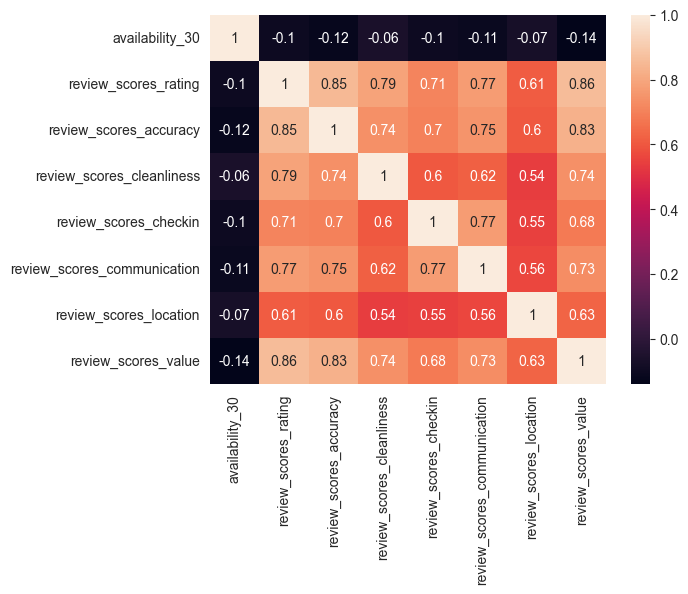

In [9]:
# ----- Perform Correlation Analysis ----- #
corr = dfListings.corr(method='pearson').round(2)
corr_map = sns.heatmap(corr, annot=True)

In [10]:
# ----- Linear Regression Functions ----- #
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def train_test(model, data, is_log=False):
    data.dropna(inplace=True)
    train_data, test_data = train_test_split(data, test_size=0.2, shuffle=True)
    if is_log:
        y_train = train_data['SALE PRICE LOG']
        y_test = test_data['SALE PRICE LOG']
    else:
        y_train = train_data['SALE PRICE']
        y_test = test_data['SALE PRICE']
        
    x_train = train_data.drop(['SALE PRICE', 'SALE PRICE LOG'], axis=1)
    x_test = test_data.drop(['SALE PRICE', 'SALE PRICE LOG'], axis=1)
    
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    if is_log:
        print("RMSE train log-scale: {}".format(rmse(y_train, y_train_pred)))
        print("RMSE test log-scale: {}".format(rmse(y_test, y_test_pred)))
    else:
        print("RMSE train: {}".format(rmse(y_train, y_train_pred)))
        print("RMSE test: {}".format(rmse(y_test, y_test_pred)))
    
    train_data.rename(columns={'SALE PRICE': 'Real Price'}, inplace=True)
    train_data['Predicted Price'] = y_train_pred
    train_data['Data Partition'] = 'train data'
    
    test_data.rename(columns={'SALE PRICE': 'Real Price'}, inplace=True)
    test_data['Predicted Price'] = y_test_pred
    test_data['Data Partition'] = 'test data'
    
    all_data = pd.concat([train_data, test_data])
    return all_data

In [11]:
# ----- Split Data & Run Regression ----- #

# make sure to run Q5 and Q4 code to initialize the data
eng_data = df_q6_eng # from Q5
eng_data['SALE PRICE LOG'] = np.log(1 + eng_data['SALE PRICE'])
raw_data = df_q6_raw # from Q4
raw_data['SALE PRICE LOG'] = np.log(1 + raw_data['SALE PRICE'])

##### Model A - Feature Engineered Model #####
print('##### Results for Model A: #####')
model_A = LinearRegression()
data_A = train_test(model_A, eng_data)
fig_q6_1 = px.scatter(data_A, x='Real Price', y='Predicted Price', trendline='ols', color='Data Partition', title='MODEL A: Real vs Predicted Brooklyn Rental Elevator Apartment Prices')
fig_q6_1.show()

##### Model B - Raw Feature Model #####
print('##### Results for Model B: #####')
model_B = LinearRegression()
data_B = train_test(model_B, raw_data)
fig_q6_2 = px.scatter(data_B, x='Real Price', y='Predicted Price', trendline='ols', color='Data Partition', title='MODEL B: Real vs Predicted Brooklyn Rental Elevator Apartment Prices')
fig_q6_2.show()

##### Compare Test Results from BOTH Models #####
data_A['Model'] = 'Model A'
data_B['Model'] = 'Model B'
part = 'test data'
data_AB = pd.concat([data_A.query('`Data Partition` == @part'), data_B.query('`Data Partition` == @part')])
data_AB = data_AB.filter(items=['Predicted Price', 'Real Price', 'Model'])
fig_q6_3 = px.scatter(data_AB, x='Real Price', y='Predicted Price', trendline='ols', color='Model', title='TEST RESULTS: Real vs Predicted Brooklyn Rental Elevator Apartment Prices')
fig_q6_3.show()

##### ##### ##### ##### #####

NameError: name 'df_q6_eng' is not defined